# Check Gaussian Fit of Filter transmission

- Author : Sylvie Dagoret-Campagne
- Creation date : February 28th 2021

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import sys
import os
sys.path.append('../')
#from delight.io import *
#from delight.utils import *
#from delight.photoz_gp import PhotozGP

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [16]:
from pkg_resources import resource_filename

In [17]:
import configparser

In [18]:
! ls ../analysis_input_rail/tmp

delight_data  parametersTest.cfg


## Defines file location

In [19]:
basedelight_datapath = resource_filename('delight', '../data')

In [20]:
filename_config="../analysis_input_rail/tmp/parametersTest.cfg"

In [21]:
#dir_filter="./data/FILTERS"
dir_filter = os.path.join(basedelight_datapath,"FILTERS")

In [22]:
filename_filters = ["lsst_u.res","lsst_g.res","lsst_r.res","lsst_i.res","lsst_z.res","lsst_y.res"]
filename_fitfilters = ["lsst_u_gaussian_coefficients.txt", "lsst_g_gaussian_coefficients.txt",
             "lsst_r_gaussian_coefficients.txt","lsst_i_gaussian_coefficients.txt",
            "lsst_z_gaussian_coefficients.txt", "lsst_y_gaussian_coefficients.txt"]

## Decode parameter file

In [23]:
config = configparser.ConfigParser()
if not os.path.isfile(filename_config):
    raise Exception(filename_config +' : file not found')
config.read(filename_config)
config.sections()

['Bands', 'Templates', 'Simulation', 'Training', 'Target', 'Other']

In [24]:
numCoefs  = int(config["Bands"]["numCoefs"])
bandNames = config["Bands"]['names']
bandColors = ["b","g","r","orange","grey","k"]

In [25]:
band_names=bandNames.split(" ")

In [26]:
Nbands=len(band_names)

## Plot filters and fitted filter transmission

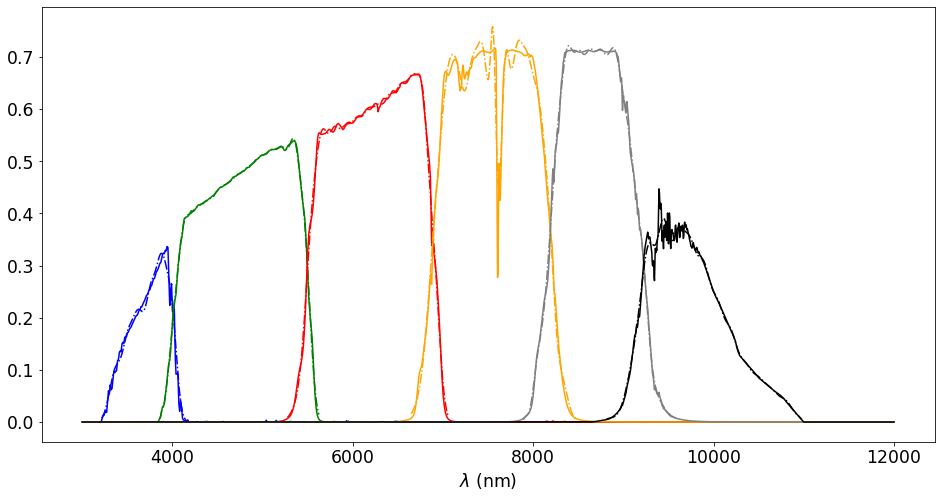

In [28]:
plt.figure(figsize=(16,8))
for idx_filter in np.arange(Nbands):
    
    # read coefficients of fits
    full_filename_fitfilter=os.path.join(dir_filter,filename_fitfilters[idx_filter])
    coefs=np.loadtxt(full_filename_fitfilter)
    
    # read filters
    full_filename_filter=os.path.join(dir_filter,filename_filters[idx_filter])
    data = np.genfromtxt(full_filename_filter)
    
    x, y = data[:, 0], data[:, 1]
    #y /= x  # divide by lambda
    # Only consider range where >1% max
    ind = np.where(y > 0.01*np.max(y))[0]
    lambdaMin, lambdaMax = x[ind[0]], x[ind[-1]]
    
    xf = np.linspace(lambdaMin, lambdaMax, num=1000)
    yy = 0*xf
    for i in range(numCoefs):
        yy += coefs[i, 0] * np.exp(-0.5*((coefs[i, 1] - xf)/coefs[i, 2])**2.0)
        
    plt.plot(x,y,"-",color=bandColors[idx_filter])
    plt.plot(xf,yy,"-.",color=bandColors[idx_filter])
    plt.xlabel("$\lambda$ (nm)")